In [71]:
# importando as libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [72]:
# importação dos dados
renda = pd.read_csv('dados.csv')
renda.head()

,Territorialidades,Ano,PIB per capita
0,Brasil,2013,"22,2"
1,Acre,2013,"12,37"
2,Alagoas,2013,"9,45"
3,Amapá,2013,"14,53"
4,Amazonas,2013,"18,25"


In [73]:
# Dimensão dos dados
renda.shape

(112, 3)

In [74]:
# Verificar se possui campos nulos
renda.isnull().sum()

Territorialidades    0
Ano                  0
PIB per capita       0
dtype: int64

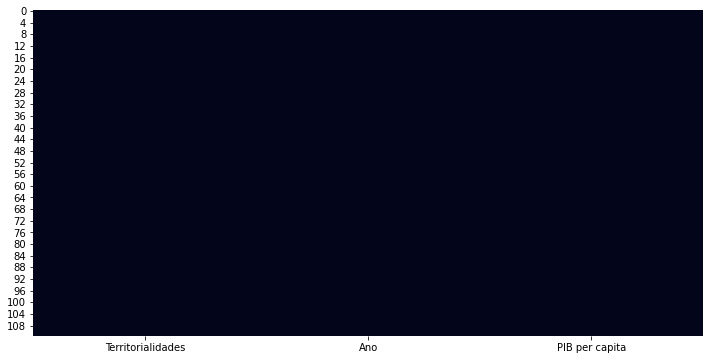

In [75]:
# Mapa de calor para ver campos nulos
plt.figure(figsize=(12,6))

sns.heatmap(renda.isnull(), cbar=False);

In [96]:
# Alterar a virgula para ponto na coluna PIB per capita
renda['PIB per capita'] = renda['PIB per capita'].str.replace(',','.')
renda

,Territorialidades,Ano,PIB per capita
0,Brasil,2013,22.2
1,Acre,2013,12.37
2,Alagoas,2013,9.45
3,Amapá,2013,14.53
4,Amazonas,2013,18.25
...,...,...,...
107,Roraima,2016,14.22
108,Santa Catarina,2016,24.71
109,São Paulo,2016,30.24
110,Sergipe,2016,11.39


In [97]:
# Alterar tipo de objeto para Float
renda['PIB per capita'] = renda['PIB per capita'].astype(float)
renda

,Territorialidades,Ano,PIB per capita
0,Brasil,2013,22.20
1,Acre,2013,12.37
2,Alagoas,2013,9.45
3,Amapá,2013,14.53
4,Amazonas,2013,18.25
...,...,...,...
107,Roraima,2016,14.22
108,Santa Catarina,2016,24.71
109,São Paulo,2016,30.24
110,Sergipe,2016,11.39


In [98]:
# Calcular a media por territorialidade
renda.groupby(by=['Territorialidades']).mean()

,Ano,PIB per capita
Territorialidades,,
Acre,2014.5,12.3000
Alagoas,2014.5,9.7400
Amapá,2014.5,13.4500
Amazonas,2014.5,16.6250
Bahia,2014.5,11.4825
Brasil,2014.5,21.5000
Ceará,2014.5,10.6150
Distrito Federal,2014.5,53.2925
Espírito Santo,2014.5,23.0025


In [99]:
renda.head()

,Territorialidades,Ano,PIB per capita
0,Brasil,2013,22.20
1,Acre,2013,12.37
2,Alagoas,2013,9.45
3,Amapá,2013,14.53
4,Amazonas,2013,18.25


In [102]:
# Verificar o valor medio por territoriedade
renda.groupby(by= ['Territorialidades','Ano']).mean()
renda

,Territorialidades,Ano,PIB per capita
0,Brasil,2013,22.20
1,Acre,2013,12.37
2,Alagoas,2013,9.45
3,Amapá,2013,14.53
4,Amazonas,2013,18.25
...,...,...,...
107,Roraima,2016,14.22
108,Santa Catarina,2016,24.71
109,São Paulo,2016,30.24
110,Sergipe,2016,11.39


In [ ]:
# Avaliar Pib Per Capita por territorialidade com Grids

Cor_fundo = '#f5f5f5'

# Criando o sistema de grids

grid = sns.FacetGrid(renda, col='Territorialidades', hue='Territorialidades', col_wrap=4)

# Adicionar gráfico de linhas

grid = grid.map(plt.plot, 'Ano', 'PIB per capita')